**Mini Project On Myntra Sales Dataset**

**Dataset : myntra_dataset.csv**

**source :https://www.kaggle.com/datasets/skmewati/myntra-sales-dataset**

In [86]:
sc

<SparkContext master=local[*] appName=PySparkShell>

**Myntra Dataset Insights**

The Myntra dataset provides a comprehensive view of products across brands, categories, prices, and ratings, just like the Office dataset gave insights
into employees. It highlights Myntra’s diverse fashion catalog, customer engagement through ratings, and brand dominance patterns—making it useful for 
retail analytics, recommendation engines, and trend studies.

**1. Structure and Uniqueness**

The dataset consists of rows of products with attributes such as product ID, brand, category, sub-category, product name, price, rating, reviews, and 
availability.Each product has a unique identifier (similar to employee_id in the office dataset).Brand names and product names have duplicates because
multiple items may fall under the same brand or style.

**2. Brand Distribution**

Several brands are represented, with top fashion brands (like Roadster, HRX, W, H&M, etc.) having the highest product counts.Some niche brands have 
fewer items, showing Myntra’s mix of mainstream and specialty fashion.

**3. Category and Sub-Category Representation**

The dataset covers multiple categories: clothing, footwear, accessories, and more.Sub-categories include specific product types like T-shirts, kurtas, 
dresses, sneakers, jeans, and formal wear.Clothing dominates the dataset (similar to HR being the largest department in the office dataset).

**4. Price Insights**

Prices range from very low-cost items (affordable wear) to premium/high-end products.The average price sits in the mid-range, showing Myntra’s balance 
of budget and premium fashion.A wide standard deviation in prices indicates strong diversity in affordability.Outliers (very high prices) likely belong
to premium international brands.

**5. Rating and Review Patterns**

Ratings generally range from 1 to 5, with most items clustered between 3.5 and 4.5, indicating good customer satisfaction.Products with higher reviews
are usually from trusted/popular brands.Some products may have no ratings yet, suggesting they are newly listed.

**6. Availability & Popularity**

Availability indicates whether the product is in stock or out of stock.Popular categories (like T-shirts, casual wear, ethnic wear) show higher 
availability.Seasonal products (like winter jackets or festive ethnic wear) may show fluctuating availability.

**7. Key Relationships**

Price vs Rating: Premium products don’t always have the highest ratings; mid-priced products often show better satisfaction.Brand vs Popularity: 
Well-known brands (HRX, H&M, Roadster) get consistently high reviews.Category vs Price: Accessories and casual wear are generally lower priced, while 
dresses, footwear, and formal wear have higher ranges.

**8. Dataset Characteristics**

The dataset is rich in product-level details, suitable for:
E-commerce analytics
Customer preference studies
Price optimization
Recommendation systems
No major missing values (depending on availability/rating columns), making it suitable for reliable analysis.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("myntra_dataset.csv")
df

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374,2499,0.45,4.2,57
1,Flying Machine,Men Slim Fit Jeans,1829,2999,0.39,4.6,5
2,Roadster,Men Pure Cotton Jeans,974,2499,0.61,3.6,1100
3,Bene Kleed,Relaxed Fit Denim Jeans,873,2299,0.62,4.0,4800
4,Levis,Men 511 Slim Fit Jeans,1478,2899,0.49,4.3,264
...,...,...,...,...,...,...,...
894,HERE&NOW,Men Pure Cotton Baggy Jeans,1289,2999,0.57,3.0,5
895,Mufti,Men Super Skinny Fit Jeans,1393,3399,0.59,3.0,5
896,Aeropostale,Men Straight Fit Jeans,1257,3699,0.66,4.6,18
897,Flying Machine,Men Relaxed High-Rise Jeans,1424,2499,0.43,3.8,33


In [88]:
# Spark read
df = spark.read.csv("myntra_dataset.csv", header=True, inferSchema=True)

# Clean in Spark
df_clean = df.dropna().dropDuplicates()

# Convert to Pandas
pdf = df_clean.toPandas()


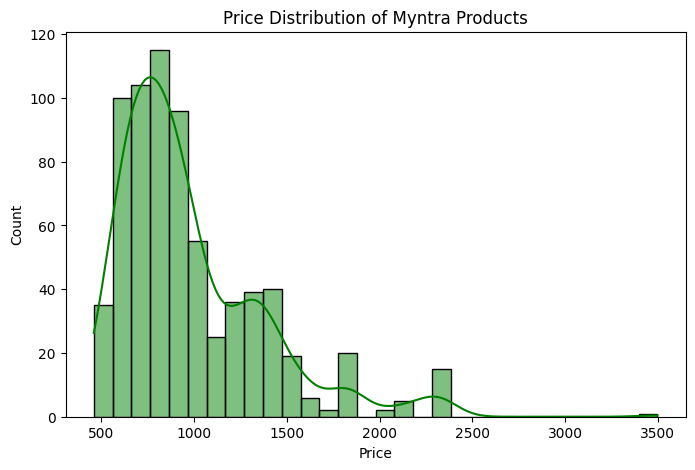

In [89]:
#1.Histogram on price distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(pdf["price"], bins=30, kde=True, color="green")
plt.title("Price Distribution of Myntra Products")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

C:\Users\varik\AppData\Local\Temp\ipykernel_14000\689385094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")


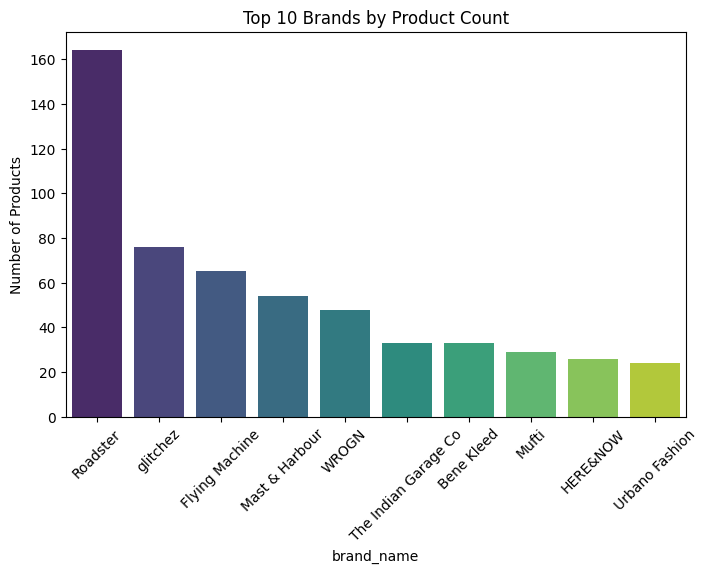

In [90]:
# 2. Top 10 brands by product count
top_brands = pdf["brand_name"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title("Top 10 Brands by Product Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Products")
plt.show()

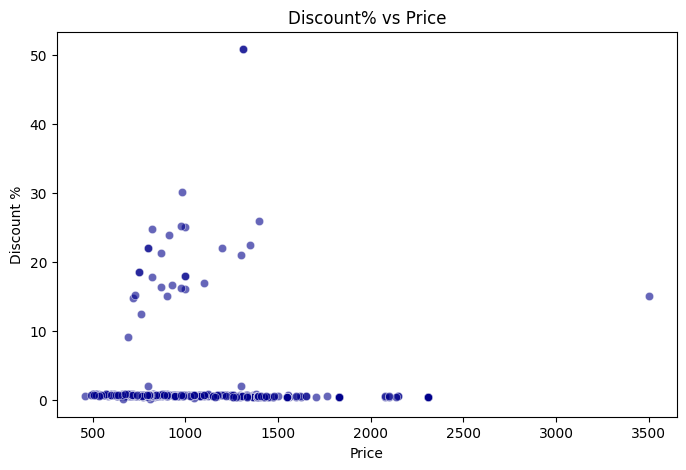

In [91]:
# 3. Discount vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="price", y="discount_percent", data=pdf, alpha=0.6,color="darkblue")
plt.title("Discount% vs Price")
plt.xlabel("Price")
plt.ylabel("Discount %")
plt.show()


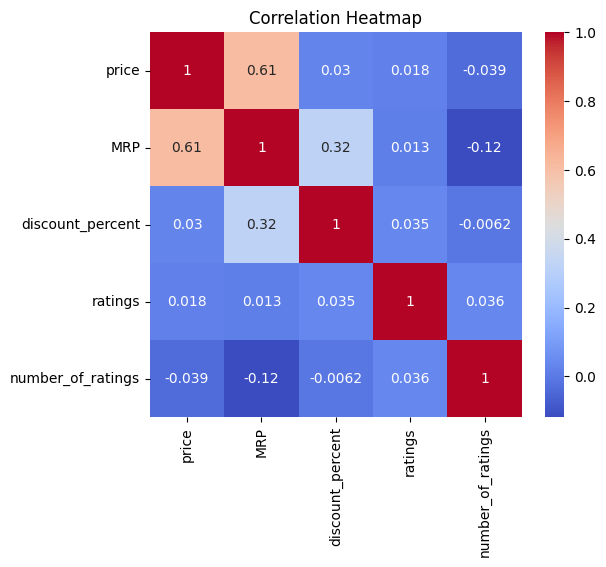

In [92]:
# 4. Feature relationship strength
plt.figure(figsize=(6,5))
sns.heatmap(pdf[["price","MRP","discount_percent","ratings","number_of_ratings"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\varik\AppData\Local\Temp\ipykernel_14000\3691869634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="brand_name", data=subset, palette="coolwarm", order=subset["brand_name"].value_counts().index)


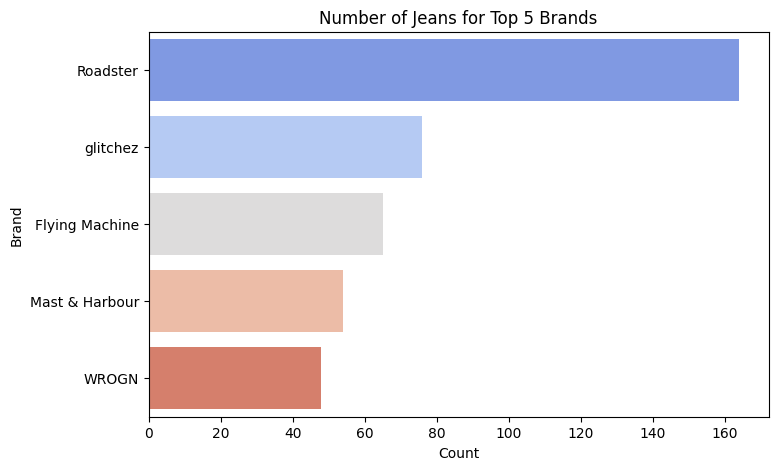

In [93]:
# 5.Get top 5 brands countplot
top_brands = pdf["brand_name"].value_counts().nlargest(5).index
subset = pdf[pdf["brand_name"].isin(top_brands)]

plt.figure(figsize=(8,5))
sns.countplot(y="brand_name", data=subset, palette="coolwarm", order=subset["brand_name"].value_counts().index)
plt.title("Number of Jeans for Top 5 Brands")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

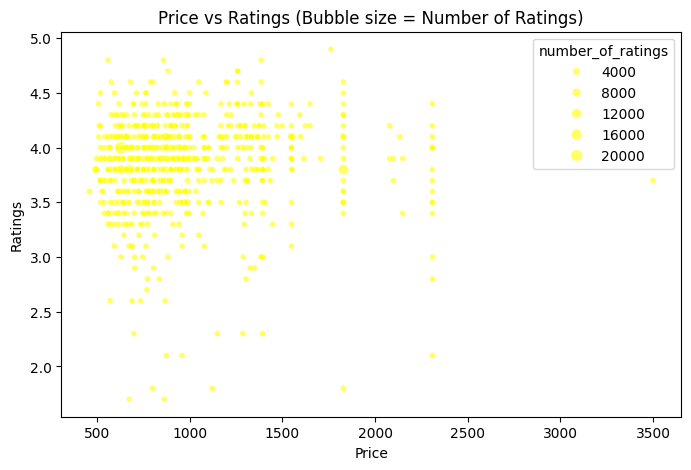

In [94]:
# 6. Price vs Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(x="price", y="ratings", size="number_of_ratings", data=pdf, alpha=0.6,color="yellow")
plt.title("Price vs Ratings (Bubble size = Number of Ratings)")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

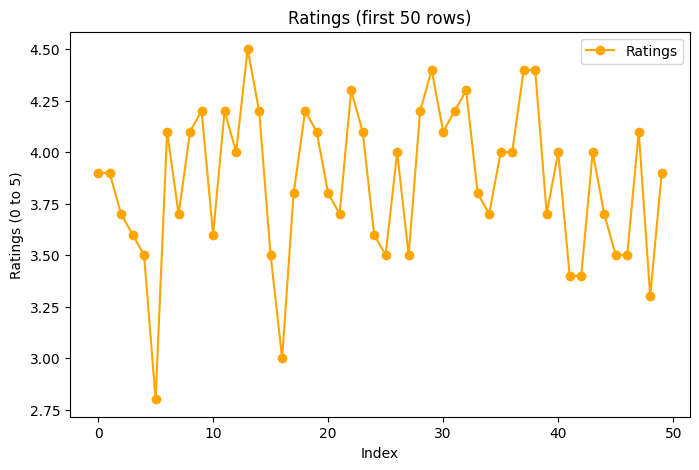

In [95]:
#7.Line Plot – Ratings
plt.figure(figsize=(8,5))
plt.plot(pdf["ratings"].head(50), label="Ratings", marker='o', color='orange')
plt.title("Ratings (first 50 rows)")
plt.xlabel("Index")
plt.ylabel("Ratings (0 to 5)")
plt.legend()
plt.show()


C:\Users\varik\AppData\Local\Temp\ipykernel_14000\524982334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="brand_name", y="price", data=subset, palette="Set2")


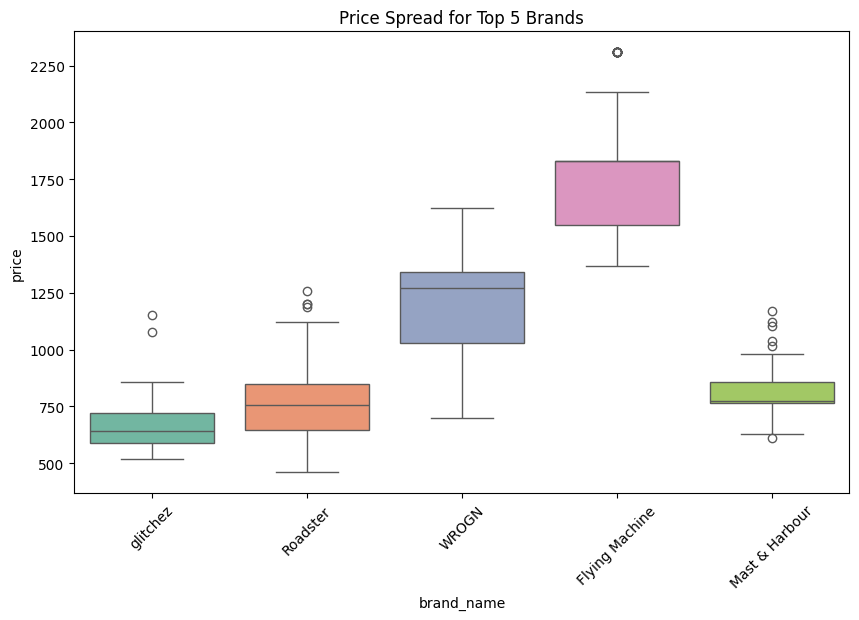

In [96]:
#8.Boxplot – Price Spread for Top 5 Brands
plt.figure(figsize=(10,6))
sns.boxplot(x="brand_name", y="price", data=subset, palette="Set2")
plt.xticks(rotation=45)
plt.title("Price Spread for Top 5 Brands")
plt.show()

C:\Users\varik\AppData\Local\Temp\ipykernel_14000\3212702232.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pants_description", y="number_of_ratings", data=top_10, palette="Set3")


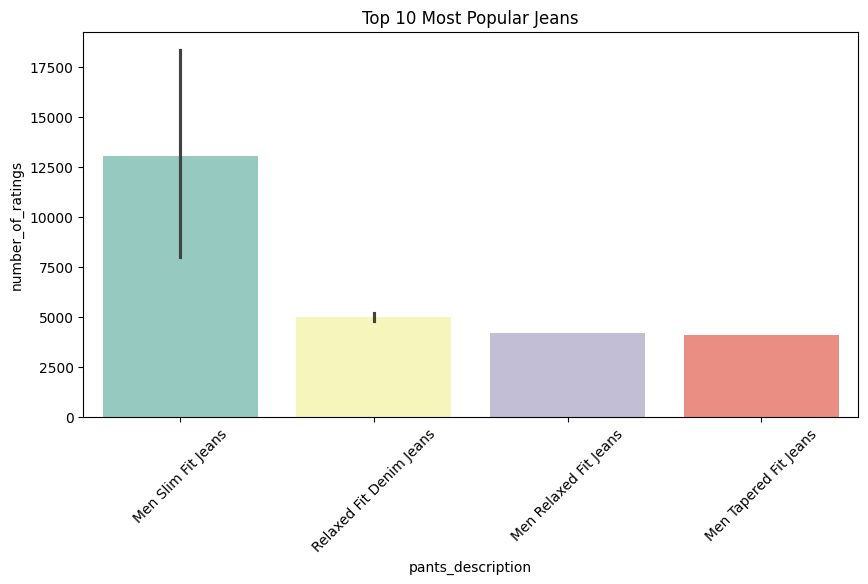

In [97]:
#9.barplot – Top 10 Most Popular Jeans (by Number of Ratings)
top_10 = pdf.nlargest(10, "number_of_ratings")

plt.figure(figsize=(10,5))
sns.barplot(x="pants_description", y="number_of_ratings", data=top_10, palette="Set3")
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Jeans")
plt.show()

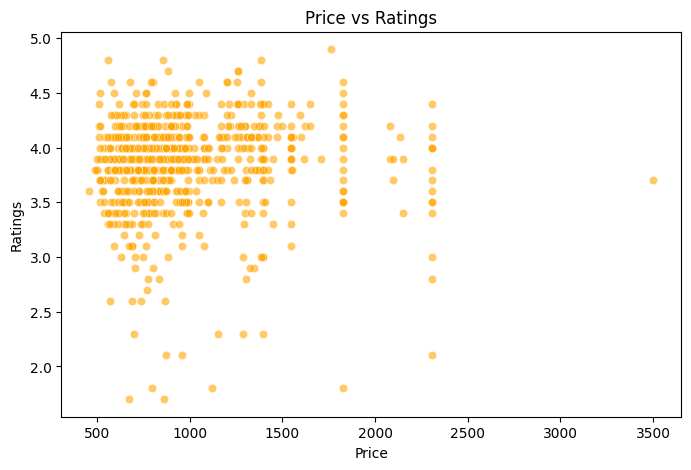

In [98]:
# 10. Optional: Price vs Ratings (if you want)
if "ratings" in pdf.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x="price", y="ratings", data=pdf, alpha=0.6,color="orange")
    plt.title("Price vs Ratings")
    plt.xlabel("Price")
    plt.ylabel("Ratings")
    plt.show()

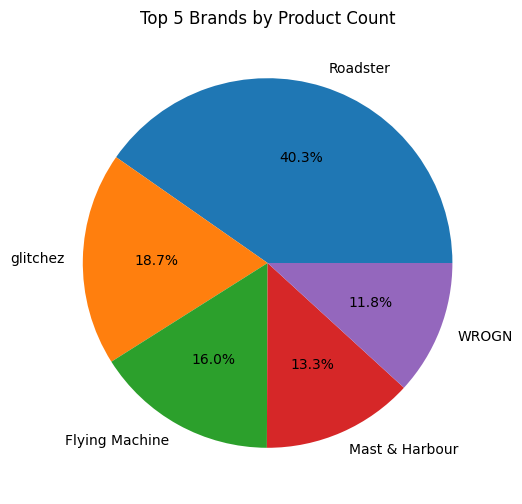

In [99]:
# 11. Pie Chart – Top 5 Brands by Product Count
top_brands = pdf["brand_name"].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%')
plt.title("Top 5 Brands by Product Count")
plt.show()

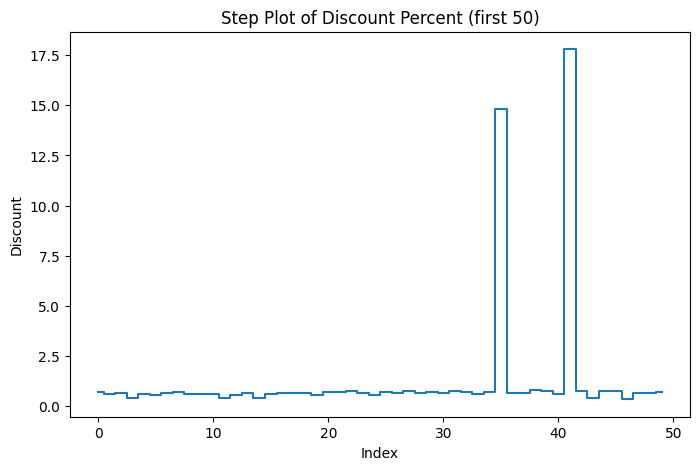

In [100]:
#12.Discount percent
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
plt.step(range(50), pdf["discount_percent"].head(50), where='mid')
plt.title("Step Plot of Discount Percent (first 50)")
plt.xlabel("Index")
plt.ylabel("Discount")
plt.show()


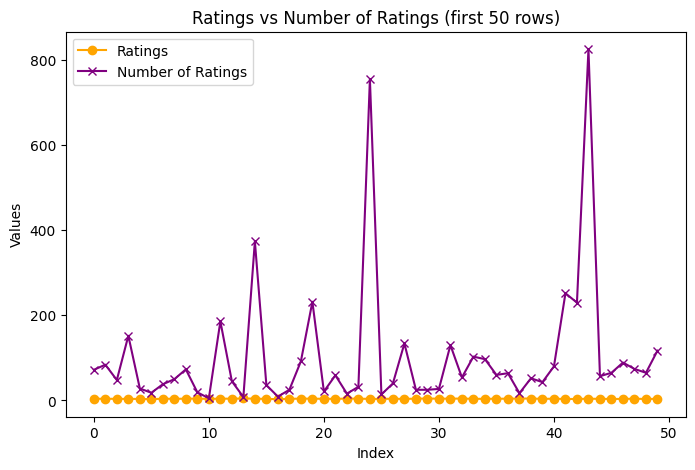

In [101]:
#13.ratings vs number of ratings
plt.figure(figsize=(8,5))
plt.plot(pdf["ratings"].head(50), label="Ratings", marker='o', color='orange')
plt.plot(pdf["number_of_ratings"].head(50), label="Number of Ratings", marker='x', color='purple')
plt.title("Ratings vs Number of Ratings (first 50 rows)")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()


In [102]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, round, count

# 1. Start Spark session
spark = SparkSession.builder.appName("myntra_dataset").getOrCreate()

# 2. Load dataset
file_path = "myntra_dataset.csv"
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

# See schema to confirm column names
df.printSchema()
df.show(5)

root
 |-- brand_name: string (nullable = true)
 |-- pants_description: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- MRP: integer (nullable = true)
 |-- discount_percent: double (nullable = true)
 |-- ratings: double (nullable = true)
 |-- number_of_ratings: integer (nullable = true)

+--------------+--------------------+-----+----+----------------+-------+-----------------+
|    brand_name|   pants_description|price| MRP|discount_percent|ratings|number_of_ratings|
+--------------+--------------------+-----+----+----------------+-------+-----------------+
|         WROGN|Men Loose Fit Cot...| 1374|2499|            0.45|    4.2|               57|
|Flying Machine|  Men Slim Fit Jeans| 1829|2999|            0.39|    4.6|                5|
|      Roadster|Men Pure Cotton J...|  974|2499|            0.61|    3.6|             1100|
|    Bene Kleed|Relaxed Fit Denim...|  873|2299|            0.62|    4.0|             4800|
|         Levis|Men 511 Slim Fit ...| 1478|2899|

In [103]:
#3. Data Cleaning
# ------------------------------
# Use actual columns: brand_name, price, ratings
df_clean = df.na.drop(subset=["brand_name", "price", "ratings"])
print("✅ Rows after cleaning:", df_clean.count())

# ------------------------------
# 4. Basic Insights
# ------------------------------
print("Total products:", df_clean.count())
print("Unique brands:", df_clean.select("brand_name").distinct().count())

✅ Rows after cleaning: 899
Total products: 899
Unique brands: 62


In [104]:
# 5. Top brands by product count
df_clean.groupBy("brand_name").count().orderBy(col("count").desc()).show(10)

+--------------------+-----+
|          brand_name|count|
+--------------------+-----+
|            Roadster|  178|
|               WROGN|  104|
|      Flying Machine|   80|
|            glitchez|   76|
|               Mufti|   72|
|      Mast & Harbour|   54|
|The Indian Garage Co|   33|
|               Levis|   33|
|          Bene Kleed|   33|
|            HERE&NOW|   26|
+--------------------+-----+
only showing top 10 rows


In [105]:

# 6. Min, Max, Avg Price by Brand
df_clean.groupBy("brand_name") \
    .agg(round(avg("price"),2).alias("avg_price"), 
         min("price").alias("min_price"), 
         max("price").alias("max_price")) \
    .orderBy(col("avg_price").desc()) \
    .show(10)


+--------------------+---------+---------+---------+
|          brand_name|avg_price|min_price|max_price|
+--------------------+---------+---------+---------+
|               TURMS|   3499.0|     3499|     3499|
|             FUGAZEE|   2099.0|     2099|     2099|
|      Flying Machine|  1808.73|     1367|     2309|
|               Levis|  1747.94|      944|     2079|
|               Mufti|  1517.54|     1208|     2149|
|          FOUL CHILD|   1407.0|     1407|     1407|
|W.T.F - Witnessin...|   1399.0|     1399|     1399|
|Peter England Cas...|   1379.0|     1379|     1379|
| StyleCast x Revolte|   1334.0|     1304|     1364|
|            Red Tape|  1333.67|     1311|     1379|
+--------------------+---------+---------+---------+
only showing top 10 rows


In [106]:
# 7. Top 10 expensive products
df_clean.select("pants_description", "brand_name", "price", "MRP") \
    .orderBy(col("price").desc()) \
    .show(10, truncate=False)

# 8. Discount analysis: Avg discount by brand
df_clean.groupBy("brand_name") \
    .agg(round(avg("discount_percent"),2).alias("avg_discount")) \
    .orderBy(col("avg_discount").desc()) \
    .show(10)

+---------------------+--------------+-----+----+
|pants_description    |brand_name    |price|MRP |
+---------------------+--------------+-----+----+
|30 Days No Wash Jeans|TURMS         |3499 |4999|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
|Men Relaxed Fit Jeans|Flying Machine|2309 |3499|
+---------------------+--------------+-----+----+
only showing top 10 rows
+--------------------+------------+
|          brand_name|avg_discount|
+--------------------+------------+
|            Red Tape|       34.19|
|            RIG BONE|       30.19|
|W.T.F - Witnessin...|        26.0|
|              ASHTOM|        22.0|
|     MERCHANT MARINE| 

In [107]:
# 9. Highly rated products (ratings > 4.5 & number_of_ratings > 100)
df_clean.filter((col("ratings") > 4.5) & (col("number_of_ratings") > 100)) \
    .select("pants_description", "brand_name", "price", "ratings", "number_of_ratings") \
    .show(5, truncate=False)

# 10. Bucket prices into ranges
df_buckets = df_clean.withColumn(
    "Price_Range",
    (col("price")/1000).cast("int")*1000
)
df_buckets.groupBy("Price_Range").count().orderBy("Price_Range").show()

+-----------------+----------+-----+-------+-----------------+
|pants_description|brand_name|price|ratings|number_of_ratings|
+-----------------+----------+-----+-------+-----------------+
+-----------------+----------+-----+-------+-----------------+

+-----------+-----+
|Price_Range|count|
+-----------+-----+
|          0|  504|
|       1000|  344|
|       2000|   50|
|       3000|    1|
+-----------+-----+



In [108]:
# 1. Get only Levis jeans with rating > 4
levis_high_rating = pdf[(pdf["brand_name"]=="Levis") & (pdf["ratings"]>4)]
levis_high_rating


,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
19,Levis,Men Slim Fit Mid-Rise Jeans,1304,2899,0.55,4.1,232
65,Levis,Men 511 Slim Fit Jeans,2079,3199,0.35,4.2,794
700,Levis,Men Regular Fit Jeans,944,2099,0.55,4.1,1100
703,Levis,Men 511 Slim Fit Jeans,1478,2899,0.49,4.3,264


In [109]:
# 2. Get top 5 cheapest jeans
pdf.nsmallest(5, "price")


,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
24,Roadster,Men Slim Fit Jeans,459,999,0.54,3.6,756
657,HIGHLANDER,Men Tapered Fit Jeans,492,1449,0.66,3.8,4100
203,Stylecast X Kotty,Men Regular Fit Mid-Rise Jeans,499,1999,0.75,3.8,36
354,Calvin Klein Jeans,Men Slim Fit Jeans,499,1999,0.75,3.8,36
608,Stylecast X Kotty,Men Mid-Rise Jeans,499,1999,0.75,3.9,86


In [110]:
# 3. Get top 5 jeans with highest discount
pdf.nlargest(5, "discount_percent")

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
535,Red Tape,Men Skinny Fit Jeans,1311,6399,50.88,4.1,201
588,Red Tape,Men Skinny Fit Jeans,1311,6399,50.88,4.1,359
483,RIG BONE,Men Mid-Rise Baggy Jeans,980,3999,30.19,3.5,6
178,W.T.F - Witnessing True Fashion,Men Relaxed Fit Jeans,1399,3999,26.00,4.2,20
348,Thomas Scott,Men Tapered Fit Jeans,979,3499,25.20,3.5,81


In [111]:
# Brand with Highest Average Discount
brand_discount = pdf.groupby("brand_name")["discount_percent"].mean().sort_values(ascending=False)
print("Brand with highest average discount:")
brand_discount.head(1)

Brand with highest average discount:


brand_name
Red Tape    34.186667
Name: discount_percent, dtype: float64

In [112]:
#Brand with Most Highly Rated Products (ratings > 4.5)
high_rating_counts = pdf[pdf["ratings"] > 4.5].groupby("brand_name").size().sort_values(ascending=False)
print("Brands with most products rated above 4.5:")
print(high_rating_counts.head())

Brands with most products rated above 4.5:
brand_name
WROGN                 4
Calvin Klein Jeans    2
Aeropostale           2
Roadster              2
Flying Machine        1
dtype: int64


In [113]:
#Top 5 Most Expensive Jeans After Discount
top_expensive = pdf.nlargest(5, "MRP")
print(top_expensive[["brand_name", "pants_description",]])

    brand_name      pants_description
38    Red Tape   Men Skinny Fit Jeans
535   Red Tape   Men Skinny Fit Jeans
588   Red Tape   Men Skinny Fit Jeans
643      TURMS  30 Days No Wash Jeans
179      Mufti     Men Slim Fit Jeans


In [114]:
df.select("brand_name").distinct().show()

+--------------------+
|          brand_name|
+--------------------+
|               Levis|
|                FCUK|
| StyleCast x Revolte|
|      Mast & Harbour|
|  Calvin Klein Jeans|
|Peter England Cas...|
|           bigbanana|
|              Ducati|
|               TURMS|
|     MERCHANT MARINE|
|            HERE&NOW|
|        Kolor Fusion|
|          HIGHLANDER|
|W.T.F - Witnessin...|
|              ASHTOM|
|          FOUL CHILD|
|             Beyoung|
|              Sztori|
|              MAAHIT|
|            Cantabil|
+--------------------+
only showing top 20 rows


In [115]:
# Rank Products Within Each Brand Based on Price
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

windowSpec = Window.partitionBy("brand_name").orderBy(col("price").desc())
ranked_df = df.withColumn("price_rank", rank().over(windowSpec))
ranked_df.select("brand_name", "pants_description", "price", "price_rank").show(15)

+-----------+--------------------+-----+----------+
| brand_name|   pants_description|price|price_rank|
+-----------+--------------------+-----+----------+
|     ASHTOM| Men High-Rise Jeans|  799|         1|
|Aeropostale|Men Straight Fit ...| 1259|         1|
|Aeropostale|Men Straight Fit ...| 1257|         2|
|Aeropostale|Men Straight Fit ...| 1220|         3|
|Being Human|  Men Slim Fit Jeans| 1259|         1|
|Being Human|  Men Slim Fit Jeans| 1169|         2|
|Being Human|Men Straight Fit ...| 1109|         3|
| Bene Kleed|Men Straight Fit ...| 1247|         1|
| Bene Kleed|Men Straight Fit ...| 1049|         2|
| Bene Kleed|Men Wide Leg High...| 1035|         3|
| Bene Kleed|Men Straight Fit ...|  989|         4|
| Bene Kleed|Mid-Rise Heavy Fa...|  989|         4|
| Bene Kleed|Mid-Rise Baggy Fi...|  989|         4|
| Bene Kleed|Men Relaxed Fit J...|  988|         7|
| Bene Kleed|Men High-Rise Bag...|  983|         8|
+-----------+--------------------+-----+----------+
only showing

**CONCLUSION**

By performing these operations on the Myntra dataset, we were able to explore and analyze the data from multiple angles. Using PySpark transformations 
like withColumn, filter, groupBy, and window functions, we derived new insights such as the savings per product, categorized discounts, and calculated 
approximate revenue. Sorting and ranking operations helped us identify the most expensive and cheapest products across brands, while distinct and count
operations provided an overview of brand diversity and product distribution. Overall, these operations give a clear understanding of product pricing, 
discount trends, customer engagement through ratings, and brand-wise performance. This type of analysis can be extremely valuable for decision-making 
in pricing strategy, inventory planning, and identifying top-performing brands.